<a href="https://colab.research.google.com/github/anthonynbui/lab-1-phase-2-anthonynbui/blob/main/Copy_of_DATA_301_Lab_1B_Anthony_Bui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

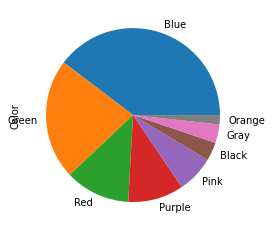

In [ ]:
# TYPE YOUR CODE HERE.
import pandas as pd

class_sheet_path = "https://docs.google.com/spreadsheets/d/1DRZIr2RdDT6ixUgXph_zQS4G4bgZKP_lx5JmhfIDQrQ/edit#gid=970845822".replace("/edit#gid=", "/export?format=csv&gid=") 

df_class_survey = pd.read_csv(class_sheet_path)

df_class_survey = df_class_survey.rename({'What is your major?': 'Major',
                      'Where are you living this quarter?': 'Living location',
                     'How many siblings do you have?': 'Siblings',
                     'What is your favorite color?': 'Favorite color',
                     'What is a cool TV show, movie, or book that you liked in 2020?': 'TVshow, movie, or book liked in 2020',
                     'Do you consider yourself a sports fan?': 'Sports fan',
                     'Do you enjoy video games?': 'Enjoy video games',
                     'Do you consider yourself artistic?': 'Artistic'},
                      axis=1)
# Dataset is now stored in a Pandas Dataframe

def clean_color(c): 
  if c in ["blue", "Navy ","navy blue","Light Blue", "Royal Blue","Blue/Indigo","Blue and Black"]:
    return "Blue"
  if c in ["green","dark green","Forest Green", "dark green","turquoise","Teal"]:
    return "Green"
  if c in ["purple"]:
    return "Purple"
  if c in ["red","Magenta"]:
    return "Red"
  if c in ["black"]:
    return "Black"
  if c in ["grey"]:
    return "Gray"
  if c in ["light pink", "pink"]:
    return "Pink"
  if c in ["Orange and Blue"]:
    return "Orange"
  else:
    return c

df_class_survey["Color"] = df_class_survey["Favorite color"].map(clean_color)
df_class_survey["Color"].value_counts().plot.pie()

# df_class_survey["What is your favorite color?"].value_counts(normalize=True).plot.pie()


**Since some people chose 2 colors, only the first color in their choice will be considered as the favorite color**

The most popular color between students was blue, and then followed up by Red and Green.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

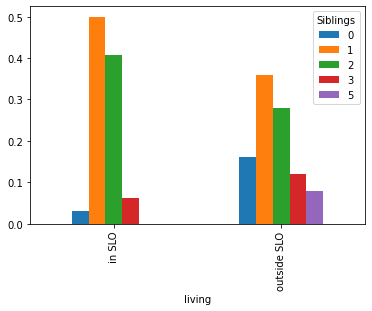

In [ ]:
# TYPE YOUR CODE HERE.
df_class_survey["living"] = df_class_survey["Living location"].map({
    "On-Campus housing":"in SLO",
    "Off Campus, but in SLO":"in SLO",
    "Off Campus, outside of SLO":"outside SLO"
})

df_class_survey["living"].value_counts()

joint_siblings_living = pd.crosstab(df_class_survey["living"], df_class_survey["Siblings"], 
                                    normalize=True)
joint_siblings_living

living = joint_siblings_living.sum(axis = 1)

cond_siblings_living = joint_siblings_living.divide(living, axis=0)
cond_siblings_living
cond_siblings_living.plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.** Given you live in SLO, you have a higher chance of having 1 or 2 siblings. If you are living outside of SLO, you have a higher chance of having 0 or 3 siblings than someone who lives in SLO.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

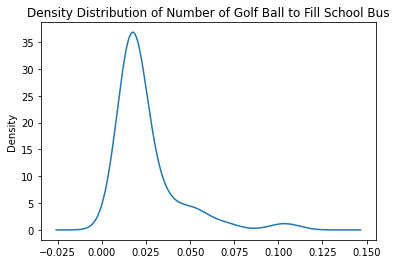

In [ ]:
# TYPE YOUR CODE HERE.
df_class_survey["Number of golf balls to fill school bus"].value_counts(normalize = True).plot.density(title = "Density Distribution of Number of Golf Ball to Fill School Bus")


In [ ]:
joint_game_golf = pd.crosstab(df_class_survey["Number of golf balls to fill school bus"],df_class_survey["Enjoy video games"])
game = joint_game_golf.sum(axis = 0)
game

Enjoy video games
No     13
Yes    45
dtype: int64

In [ ]:
cond_game_golf = joint_game_golf.divide(game,axis = 1)
cond_game_golf.head()

Enjoy video games,No,Yes
Number of golf balls to fill school bus,,
2500.0,0.000000,0.022222
5000.0,0.076923,0.044444
6500.0,0.000000,0.022222
7856.0,0.000000,0.022222
9000.0,0.076923,0.000000


[Text(0.5, 0, 'Number of balls(e+07)')]

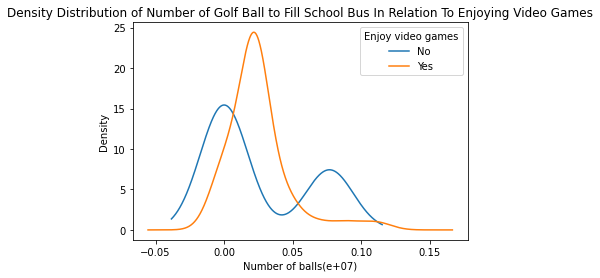

In [ ]:
cond_game_golf.plot(kind = "density", title = "Density Distribution of Number of Golf Ball to Fill School Bus In Relation To Enjoying Video Games").set(xlabel='Number of balls(e+07)')

**TYPE YOUR WRITTEN EXPLANATION HERE.**

Since more people answered yes when asked whether they enjoy video games, I conditioned the joint table based on the game axis.

According to the density distribution graph above, it seems that people who said yes have one high density point where as the people who said no have two high density points. This suggests that, the "yes" group tends to answer similarly, and the "no" group either answered a very small number or a very large number. 

## Question 4

Write and answer your own question using this data set.

Is there a relationship between someones major and whether they enjoy video games?

In [ ]:
# TYPE YOUR CODE HERE.
df_major = df_class_survey["Major"]
df_major.value_counts()

Computer Science    29
Statistics          15
Other               14
Name: Major, dtype: int64

In [ ]:
df_videogames = df_class_survey["Enjoy video games"]
df_videogames.value_counts()

Yes    45
No     13
Name: Enjoy video games, dtype: int64

In [ ]:
joint_major_videogames = pd.crosstab(df_major, df_videogames, )
joint_major_videogames

Enjoy video games,No,Yes
Major,,
Computer Science,4,25
Other,4,10
Statistics,5,10


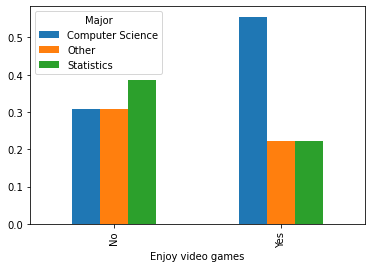

In [ ]:
df_videogames = df_class_survey["Enjoy video games"]

joint_major_videogames = pd.crosstab(df_major, df_videogames)
joint_major_videogames

videogames = joint_major_videogames.sum(axis=0)

cond_major_videogames = joint_major_videogames.divide(videogames, axis=1)

cond_major_videogames.T.plot.bar()

In [ ]:
cond_major_videogames

Enjoy video games,No,Yes
Major,,
Computer Science,0.307692,0.555556
Other,0.307692,0.222222
Statistics,0.384615,0.222222


Given you enjoy video games, you have a higher chance of being a Computer Science major than Statistics or any other major. Given you do not enjoy video games, you have a higher chance of being Statistics major than a Computer Science major or any other major.
